In [22]:
# Import Libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.others import daily_return,cumulative_return
from plotly.offline import init_notebook_mode
import cufflinks as cf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import requests
from bs4 import BeautifulSoup
import warnings
from tqdm.auto import tqdm

warnings.filterwarnings("ignore")
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [23]:
# Webscrapping Wikipedia table to get the SP500 components
page = requests.get("https://en.wikipedia.org/wiki/Swiss_Market_Index")
soup = BeautifulSoup(page.text, 'html.parser') 
table = soup.find('table', class_="wikitable sortable")

In [24]:
# Convert html table to dataframe
wiki = pd.read_html(str(table))
wiki = pd.concat(wiki)
wiki.head(40)

,Rank,Name,Industry,Ticker,Canton,Weighting in %
0,1,Nestlé SA,Food,NESN.SW,Vaud,19[1]
1,2,Roche Holding AG,Pharmacy,ROG.SW,Basel,17[1]
2,3,Novartis International AG,Pharmacy,NOVN.SW,Basel,17[1]
3,4,Compagnie Financière Richemont SA,Luxury Goods,CFR.SW,Geneva,7[1]
4,5,Zurich Insurance Group AG,Insurance,ZURN.SW,Zurich,6[1]
5,6,UBS Group AG,Banks,UBSG.SW,Zurich/Basel,5[1]
6,7,ABB Ltd,Electrical equipment,ABBN.SW,Zurich,4[1]
7,8,Lonza Group AG,Chemistry,LONN.SW,Basel,4[1]
8,9,Sika AG,Chemistry,SIKA.SW,Zug,3[1]
9,10,Alcon Inc,Pharmacy,ALC.SW,Fribourg,3[1]


In [25]:
# Get the data for the stock
index_list = wiki['Ticker'].tolist()
index_list.append('^SSMI')

In [26]:
# Save all the historical data
for stock in tqdm(index_list):
    data = yf.download(stock, progress=False)
    data.to_csv(f"../input/{stock}.csv",index=True)

  0%|          | 0/21 [00:00<?, ?it/s]

In [27]:
# Configuration of different parameters of the notebook
ticker = '^SSMI'
year = '2024'

In [28]:
# Check DataFrame
stock_ticker = pd.read_csv(f"../input/{ticker}.csv",index_col="Date",parse_dates=True)
stock_ticker.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-11-09,1378.900024,1389.000000,1375.300049,1387.099976,1387.099976,0
1990-11-12,1388.099976,1408.099976,1388.099976,1407.500000,1407.500000,0
1990-11-13,1412.199951,1429.400024,1411.400024,1415.199951,1415.199951,0
1990-11-14,1413.599976,1413.599976,1402.099976,1410.300049,1410.300049,0
1990-11-15,1410.599976,1416.699951,1405.099976,1405.699951,1405.699951,0
1990-11-16,1405.699951,1407.400024,1389.400024,1395.199951,1395.199951,0
1990-11-19,1395.599976,1417.900024,1395.599976,1416.000000,1416.000000,0
1990-11-20,1414.800049,1415.000000,1404.699951,1405.800049,1405.800049,0
1990-11-21,1405.599976,1405.599976,1396.699951,1398.400024,1398.400024,0


In [29]:
# Check DataFrame tail
stock_ticker.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-11,11634.570312,11685.190430,11623.469727,11685.190430,11685.190430,26739900
2024-03-12,11721.589844,11775.969727,11669.669922,11762.049805,11762.049805,28081500
2024-03-13,11757.379883,11799.910156,11735.910156,11790.459961,11790.459961,28301200
2024-03-14,11747.519531,11779.759766,11688.349609,11720.700195,11720.700195,27138900
2024-03-15,11733.919922,11761.030273,11676.129883,11676.129883,11676.129883,109534400
2024-03-18,11663.620117,11666.089844,11593.410156,11623.629883,11623.629883,21945200
2024-03-19,11588.089844,11613.719727,11536.269531,11577.799805,11577.799805,25413300
2024-03-20,11570.110352,11635.440430,11558.500000,11618.629883,11618.629883,23679600
2024-03-21,11651.429688,11779.240234,11650.599609,11703.660156,11703.660156,29803200


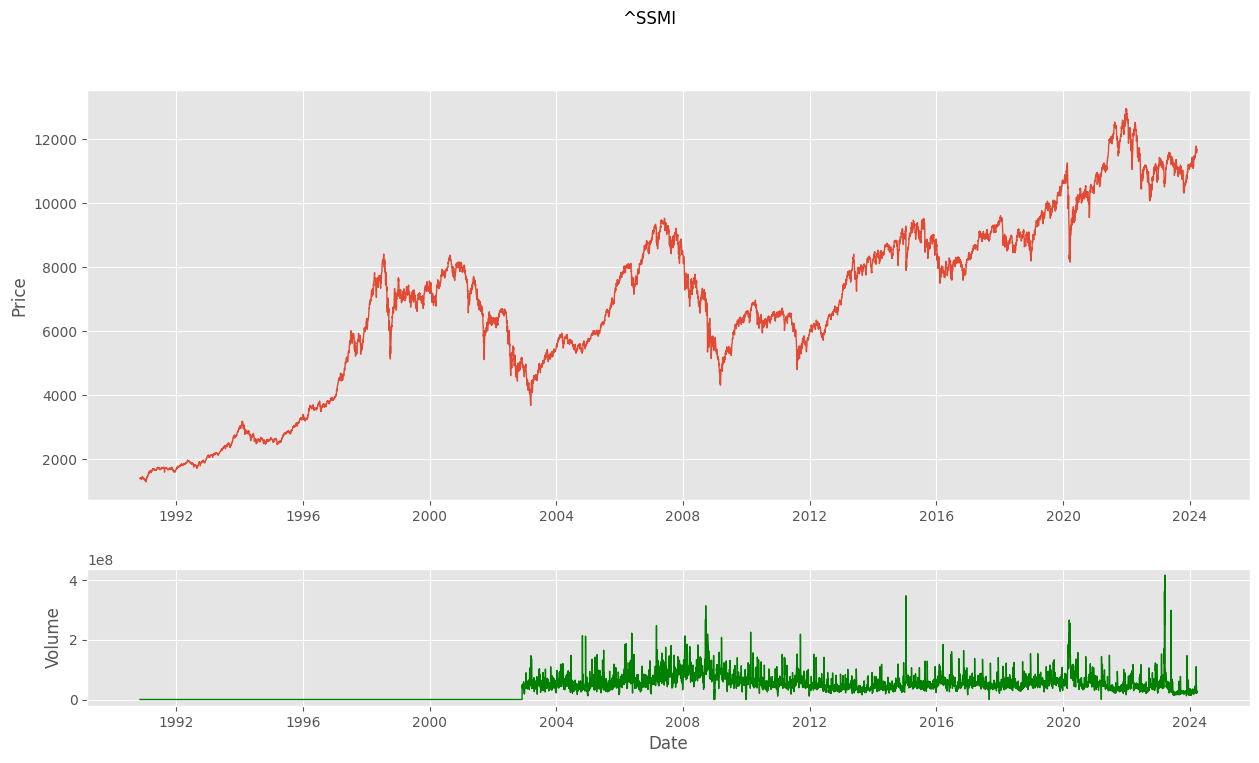

In [30]:
# Plot the adjusted close price
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8),sharex=True)

fig.suptitle(f"{ticker}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Adj Close'],linewidth=1)
axs[0].tick_params(labelbottom=True)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(stock_ticker['Volume'],linewidth=1,color='g')

plt.show()

In [31]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':3,'colspan':1}],[None],[None],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Adj Close'],mode="lines",name=f"{ticker}"),row=1, col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Volume'],mode="lines",name='Volume'),row=4, col=1)
fig.update_yaxes(title_text="Volume", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker}")

fig.show()

In [32]:
# Add Technical Analysis Indicators

# Modified Moving Average 20
stock_ticker['MMA20'] = stock_ticker['Adj Close'].loc[year].rolling(20).mean() #Adj Close 20 MA

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=stock_ticker["Adj Close"].loc[year], window=20, window_dev=2)

# Bollinger Bands
stock_ticker['BB_Upper'] = indicator_bb.bollinger_hband()
stock_ticker['BB_Lower'] = indicator_bb.bollinger_lband()

# Initialize RSI Indicator
indicator_rsi = RSIIndicator(close=stock_ticker["Adj Close"].loc[year], window=14)

# RSI
stock_ticker['RSI'] = indicator_rsi.rsi()

# Daily Return
stock_ticker['Daily_Return'] = daily_return(stock_ticker["Adj Close"].loc[year])

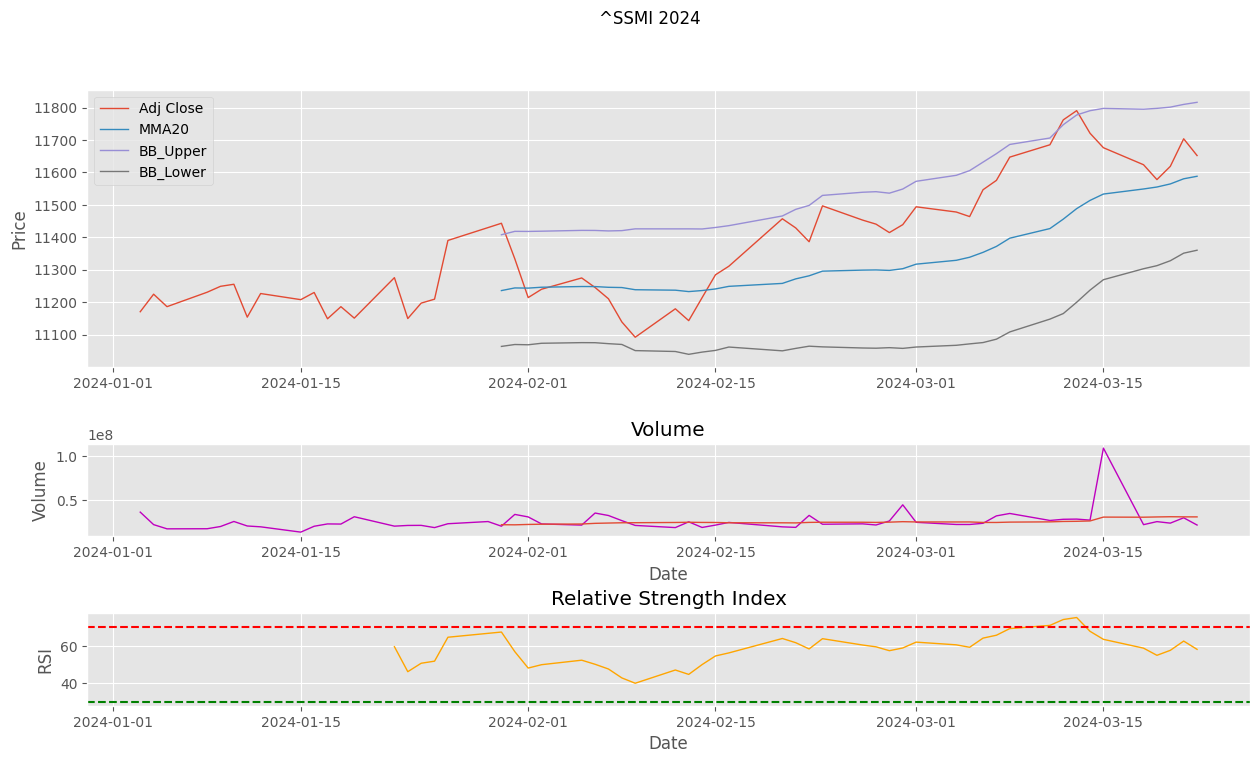

In [33]:
# Plot the adjusted close price
fig, axs = plt.subplots(3,1,gridspec_kw={'height_ratios': [3,1,1],'hspace':0.5},figsize=(15, 8),sharex=True)

# Graph 0
fig.suptitle(f"{ticker} {year}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Adj Close'].loc[year],linewidth=1)
axs[0].plot(stock_ticker['MMA20'],linewidth=1) 
axs[0].plot(stock_ticker['BB_Upper'],linewidth=1)
axs[0].plot(stock_ticker['BB_Lower'],linewidth=1)
axs[0].legend(['Adj Close','MMA20','BB_Upper','BB_Lower'])
axs[0].tick_params(labelbottom=True)

# Graph 1
axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].set_title('Volume')
axs[1].plot(stock_ticker['Volume'].loc[year],linewidth=1,color='m')
axs[1].plot(stock_ticker['Volume'].loc[year].rolling(20).mean(),linewidth=1) #Volume 20 MMA
axs[1].tick_params(labelbottom=True)

# Graph 2
axs[2].set_title('Relative Strength Index')
axs[2].set_ylabel("RSI")
axs[2].set_xlabel("Date")
axs[2].plot(stock_ticker['RSI'],color='orange',linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
axs[2].axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
axs[2].axhline(70, linestyle='--', linewidth=1.5, color='red')

plt.show()

In [34]:
# Plot the adjusted close price
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':2,'colspan':1}],[None],[{'rowspan':1,'colspan':1}],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker['Adj Close'].loc[year].index,y=stock_ticker['Adj Close'].loc[year],mode="lines",name=f'{ticker}'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['BB_Lower'].loc[year].index,y=stock_ticker['BB_Lower'].loc[year],mode="lines",name='BB_Lower'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['BB_Upper'].loc[year].index,y=stock_ticker['BB_Upper'].loc[year],mode="lines",name='BB_Upper'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['MMA20'].loc[year].index,y=stock_ticker['MMA20'].loc[year],mode="lines",name='MMA20'),row=1,col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (3,1)
fig.add_trace(go.Scatter(x=stock_ticker['Volume'].loc[year].index,y=stock_ticker['Volume'].loc[year],mode="lines",name='Volume'),row=3, col=1)
fig.add_trace(go.Scatter(x=stock_ticker['Volume'].loc[year].index,y=stock_ticker['Volume'].loc[year].rolling(20).mean(),mode="lines",name='MMA20'),row=3,col=1)
fig.update_yaxes(title_text="Volume", row=3, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker['RSI'].loc[year].index,y=stock_ticker['RSI'].loc[year],mode="lines",name='RSI'),row=4, col=1)
fig.add_hline(y=30, line_width=1, line_dash="dash", line_color="green",row=4,col=1)
fig.add_hline(y=70, line_width=1, line_dash="dash", line_color="red",row=4,col=1)
fig.update_yaxes(title_text="RSI", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker} {year}")

fig.show()

In [35]:
stock_ticker.tail(10)

,Open,High,Low,Close,Adj Close,Volume,MMA20,BB_Upper,BB_Lower,RSI,Daily_Return
Date,,,,,,,,,,,
2024-03-11,11634.570312,11685.190430,11623.469727,11685.190430,11685.190430,26739900,11426.767480,11706.052428,11147.482533,70.943592,0.326696
2024-03-12,11721.589844,11775.969727,11669.669922,11762.049805,11762.049805,28081500,11455.904980,11747.176166,11164.633795,74.098698,0.657750
2024-03-13,11757.379883,11799.910156,11735.910156,11790.459961,11790.459961,28301200,11488.288477,11777.116027,11199.460926,75.171889,0.241541
2024-03-14,11747.519531,11779.759766,11688.349609,11720.700195,11720.700195,27138900,11513.641504,11790.348742,11236.934266,67.748977,-0.591663
2024-03-15,11733.919922,11761.030273,11676.129883,11676.129883,11676.129883,109534400,11533.239014,11797.399184,11269.078843,63.438762,-0.380270
2024-03-18,11663.620117,11666.089844,11593.410156,11623.629883,11623.629883,21945200,11548.889990,11794.902553,11302.877428,58.701336,-0.449635
2024-03-19,11588.089844,11613.719727,11536.269531,11577.799805,11577.799805,25413300,11554.931982,11797.528536,11312.335429,54.850589,-0.394284
2024-03-20,11570.110352,11635.440430,11558.500000,11618.629883,11618.629883,23679600,11564.426465,11801.321209,11327.531720,57.523938,0.352658
2024-03-21,11651.429688,11779.240234,11650.599609,11703.660156,11703.660156,29803200,11580.300977,11809.720341,11350.881613,62.503309,0.731844


  0%|          | 0/21 [00:00<?, ?it/s]

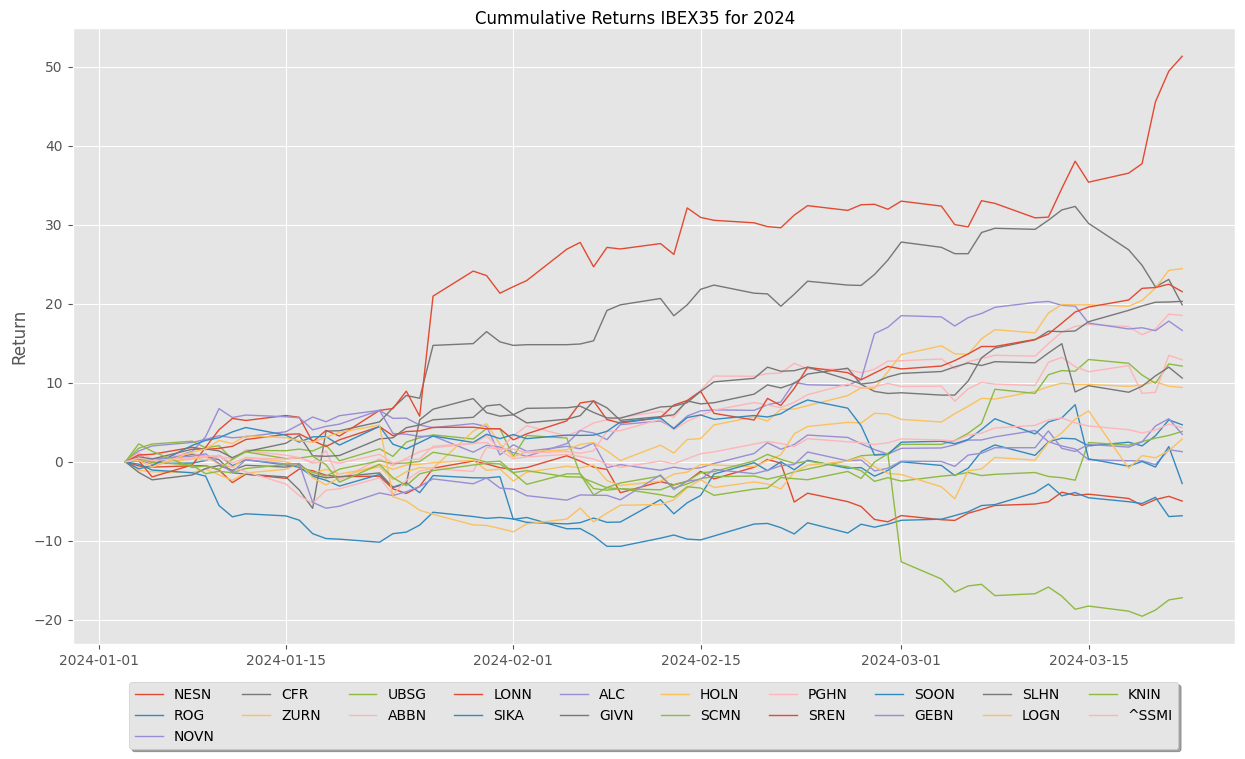

In [36]:
# Plot Cummulative Returns
fig, axs = plt.subplots(figsize=(15, 8))

# Graph
fig.suptitle(f"Cummulative Returns IBEX35 for {year}")
axs.set_ylabel('Return')
labels = []

# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    axs.plot(df['Cummulative_Return'].loc[year],linewidth=1)
    labels.append(stock.split('.')[0])

# Shrink current axis's height by 10% on the bottom
box = axs.get_position()
axs.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height])

# Put a legend below current axis
axs.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=10)

plt.show()

In [37]:
# Plotly
fig = make_subplots()

# Graph (1,1)
# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    fig.add_trace(go.Scatter(x=df['Cummulative_Return'].loc[year].index,y=df['Cummulative_Return'].loc[year],mode="lines",name=stock.split('.')[0]),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Return", row=1, col=1)

fig.update_layout(height=800, width=1300,showlegend=True,title=f"Cummulative Returns {ticker} for {year}")

fig.show()

  0%|          | 0/21 [00:00<?, ?it/s]

In [40]:
# Create also table of cummulative returns
list = []

for stock in tqdm(index_list):
    f = os.path.join("../input",stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    list.append([df.loc[year].tail(1).index.item(),stock.split('.csv')[0],df["Cummulative_Return"].loc[year].iloc[-1]])


cum = pd.DataFrame(list, columns=['Date','Ticker','Cummulative_Return'])
cum = wiki[['Ticker','Name']].merge(cum,on='Ticker')
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False)


  0%|          | 0/21 [00:00<?, ?it/s]

,Ticker,Name,Date,Cummulative_Return
0,LONN.SW,Lonza Group AG,2024-03-22,51.328186
1,HOLN.SW,Holcim Limited,2024-03-22,24.443757
2,SREN.SW,Swiss Reinsurance Company Ltd,2024-03-22,21.530693
3,GIVN.SW,Givaudan SA,2024-03-22,20.310668
4,CFR.SW,Compagnie Financière Richemont SA,2024-03-22,19.866071
5,ABBN.SW,ABB Ltd,2024-03-22,18.521602
6,ALC.SW,Alcon Inc,2024-03-22,16.625157
7,PGHN.SW,Partners Group Holding AG,2024-03-22,12.906020
8,UBSG.SW,UBS Group AG,2024-03-22,12.104202
9,SLHN.SW,Swiss Life Holding AG,2024-03-22,10.597163


In [41]:
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False).head(30)

,Ticker,Name,Date,Cummulative_Return
0,LONN.SW,Lonza Group AG,2024-03-22,51.328186
1,HOLN.SW,Holcim Limited,2024-03-22,24.443757
2,SREN.SW,Swiss Reinsurance Company Ltd,2024-03-22,21.530693
3,GIVN.SW,Givaudan SA,2024-03-22,20.310668
4,CFR.SW,Compagnie Financière Richemont SA,2024-03-22,19.866071
5,ABBN.SW,ABB Ltd,2024-03-22,18.521602
6,ALC.SW,Alcon Inc,2024-03-22,16.625157
7,PGHN.SW,Partners Group Holding AG,2024-03-22,12.906020
8,UBSG.SW,UBS Group AG,2024-03-22,12.104202
9,SLHN.SW,Swiss Life Holding AG,2024-03-22,10.597163
